In [1]:
#Description: This program will predict the employee attrition

In [12]:
# Importing necessary libraries
import pygal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
sns.set(rc={'figure.figsize':(10,10)})

In [13]:
#Load the dataset
df=pd.read_csv("Attrition dataset.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0  41.0       Yes      Travel_Rarely     1102.0                   Sales   
1  49.0        No  Travel_Frequently      279.0  Research & Development   
2  37.0       Yes      Travel_Rarely     1373.0  Research & Development   
3  33.0        No  Travel_Frequently     1392.0  Research & Development   
4  27.0        No      Travel_Rarely      591.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0               1.0        2.0  Life Sciences            1.0             1.0   
1               8.0        1.0  Life Sciences            1.0             2.0   
2               2.0        2.0          Other            1.0             4.0   
3               3.0        4.0  Life Sciences            1.0             5.0   
4               2.0        1.0        Medical            1.0             7.0   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                       1.0          80.0               0.0   
1  ...                       4.0          80.0               1.0   
2  ...                       2.0          80.0               0.0   
3  ...                       3.0          80.0               0.0   
4  ...                       4.0          80.0               1.0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                8.0                    0.0             1.0             6.0   
1               10.0                    3.0             3.0            10.0   
2                7.0                    3.0             3.0             0.0   
3                8.0                    3.0             3.0             8.0   
4                6.0                    3.0             3.0             2.0   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                4.0                      0.0                   5.0  
1                7.0                      1.0                   7.0  
2                0.0                      0.0                   0.0  
3                7.0                      3.0                   0.0  
4                2.0                      2.0                   2.0  

[5 rows x 35 columns]

In [14]:
# Calulating the sum of the attrition column
a=df['Attrition'].sum
print(a)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1471    NaN
1472    NaN
1473    NaN
1474    NaN
1475    NaN
Name: Attrition, Length: 1476, dtype: object>


In [15]:
# describing the data
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1471.000000  1471.000000       1470.000000  1470.000000         1470.0   
mean     36.917063   802.619986          9.192517     2.912925            1.0   
std       9.135930   403.404701          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1471.000000   
mean      1024.865306                 2.721769    65.891156        2.730795   
std        602.024335                 1.093082    20.329428        0.712089   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [16]:
# Checking the null values
df.isnull().sum()

Age                         5
Attrition                   6
BusinessTravel              6
DailyRate                   5
Department                  6
DistanceFromHome            6
Education                   6
EducationField              6
EmployeeCount               6
EmployeeNumber              6
EnvironmentSatisfaction     6
Gender                      6
HourlyRate                  6
JobInvolvement              5
JobLevel                    6
JobRole                     6
JobSatisfaction             5
MaritalStatus               6
MonthlyIncome               6
MonthlyRate                 6
NumCompaniesWorked          6
Over18                      5
OverTime                    5
PercentSalaryHike           6
PerformanceRating           6
RelationshipSatisfaction    6
StandardHours               6
StockOptionLevel            6
TotalWorkingYears           6
TrainingTimesLastYear       6
WorkLifeBalance             6
YearsAtCompany              6
YearsInCurrentRole          6
YearsSince

In [17]:
# Removing null values
data=df.dropna()

In [20]:
# Checking again for null values
data.isnull().sum()

Age                         0
Attrition                   0
Department                  0
DistanceFromHome            0
Education                   0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
dtype: int64

In [ ]:
# Dropping unnecessary columns
data.drop(['BusinessTravel','DailyRate','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','MonthlyRate','Over18','OverTime','StandardHours','TrainingTimesLastYear','YearsWithCurrManager'],axis=1,inplace=True)

In [46]:
# Data after removing unnecessary columns
data.head()

Age  Attrition  Department  DistanceFromHome  Education  Gender  \
0  41.0          1           3               1.0        2.0       0   
1  49.0          0           2               8.0        1.0       1   
2  37.0          1           2               2.0        2.0       1   
3  33.0          0           2               3.0        4.0       0   
4  27.0          0           2               2.0        1.0       1   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  ...  \
0             3.0       2.0        1              4.0  ...   
1             2.0       2.0        2              2.0  ...   
2             2.0       1.0        3              3.0  ...   
3             3.0       1.0        2              3.0  ...   
4             3.0       1.0        3              2.0  ...   

   NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0                 8.0               11.0                3.0   
1                 1.0               23.0                4.0   
2                 6.0               15.0                3.0   
3                 1.0               11.0                3.0   
4                 9.0               12.0                3.0   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                       1.0               0.0                8.0   
1                       4.0               1.0               10.0   
2                       2.0               0.0                7.0   
3                       3.0               0.0                8.0   
4                       4.0               1.0                6.0   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0              1.0             6.0                 4.0   
1              3.0            10.0                 7.0   
2              3.0             0.0                 0.0   
3              3.0             8.0                 7.0   
4              3.0             2.0                 2.0   

   YearsSinceLastPromotion  
0                      0.0  
1                      1.0  
2                      0.0  
3                      3.0  
4                      2.0  

[5 rows x 22 columns]

In [25]:
# Retrieve the shape 
data.shape

(1470, 22)

In [26]:
# Retrieve the data types of each column
data.dtypes

Age                         float64
Attrition                    object
Department                   object
DistanceFromHome            float64
Education                   float64
Gender                       object
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
NumCompaniesWorked          float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StockOptionLevel            float64
TotalWorkingYears           float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     float64
dtype: object

In [27]:
# Retrieve the unique values in the JobLevel column
data['JobLevel'].unique()

array([2., 1., 3., 4., 5.])

<AxesSubplot:xlabel='Department', ylabel='count'>

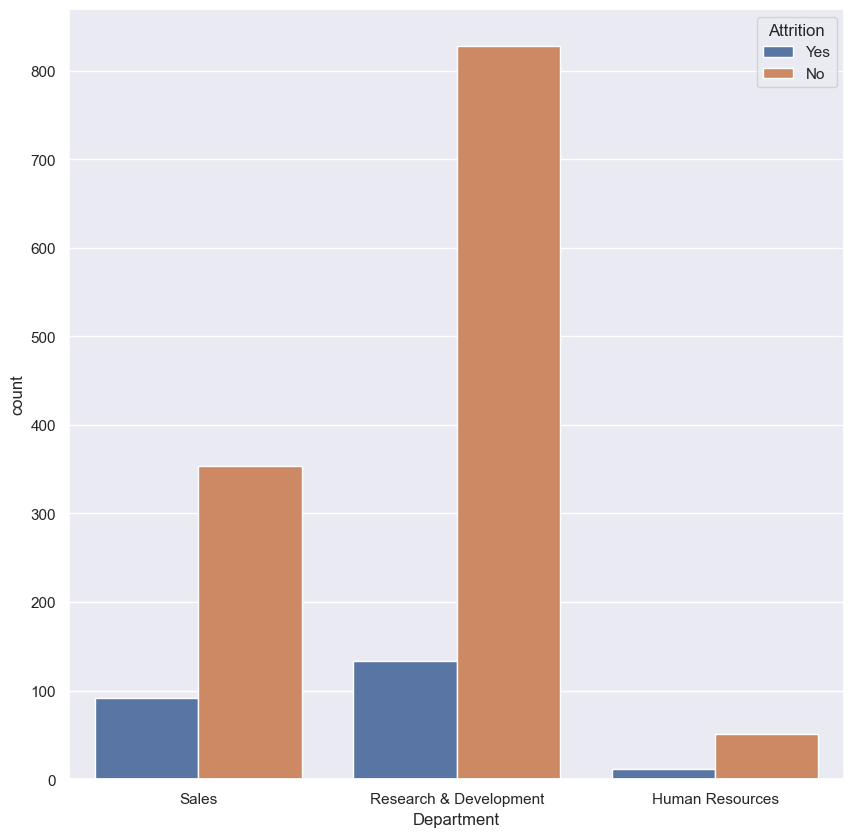

In [28]:
# Visualize the distribution of attrition across departments
sns.countplot(x='Department',hue='Attrition',data=data)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

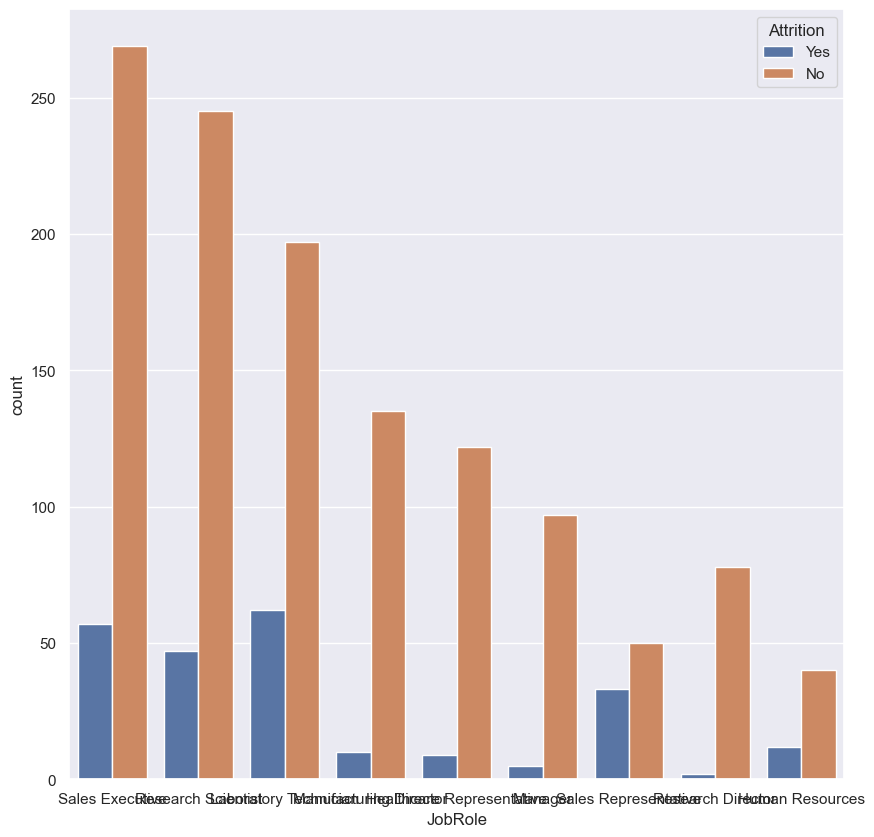

In [29]:
# visualize the distribution of attrition across different job roles
sns.countplot(x='JobRole',hue='Attrition',data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

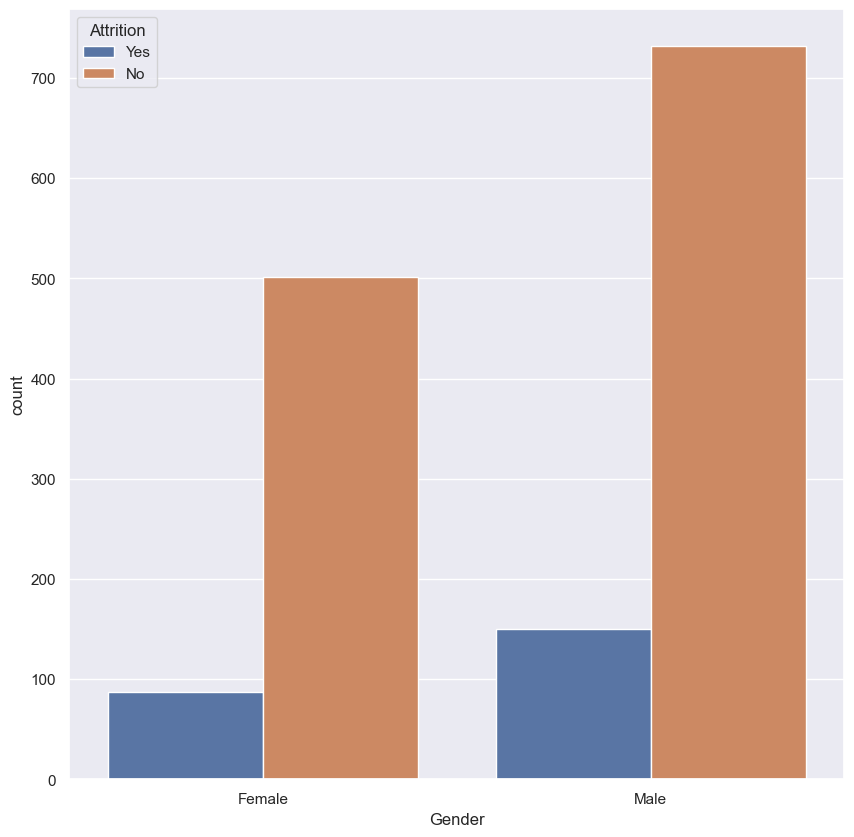

In [30]:
# visualize the distribution of attrition across gender
sns.countplot(x='Gender',hue='Attrition',data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

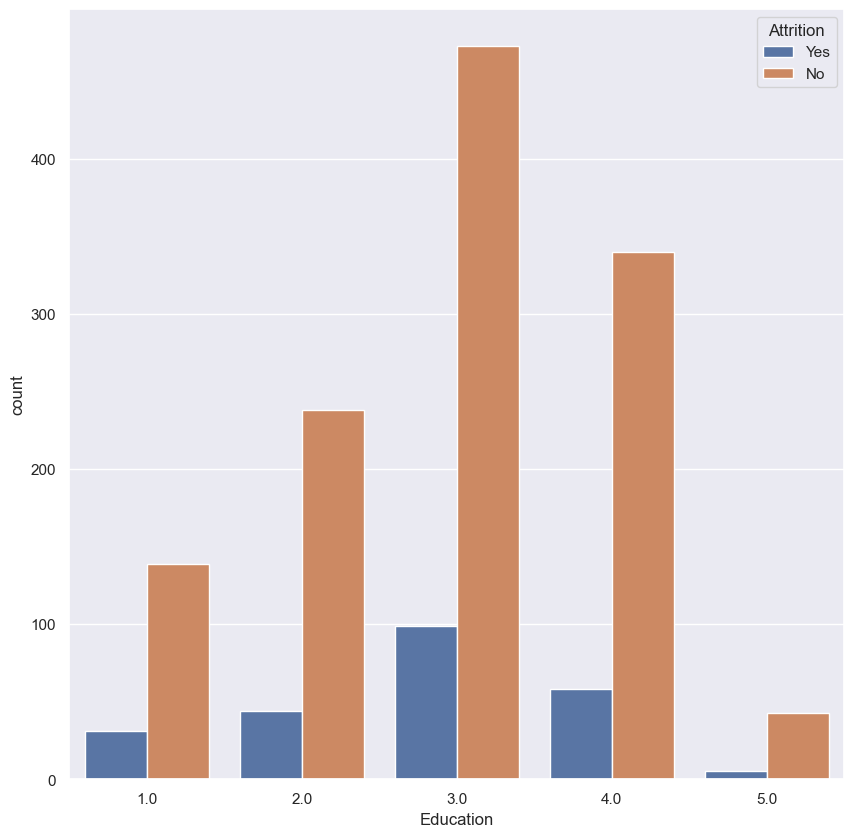

In [31]:
# visualize the distribution of attrition across education
sns.countplot(x='Education',hue='Attrition',data=data)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

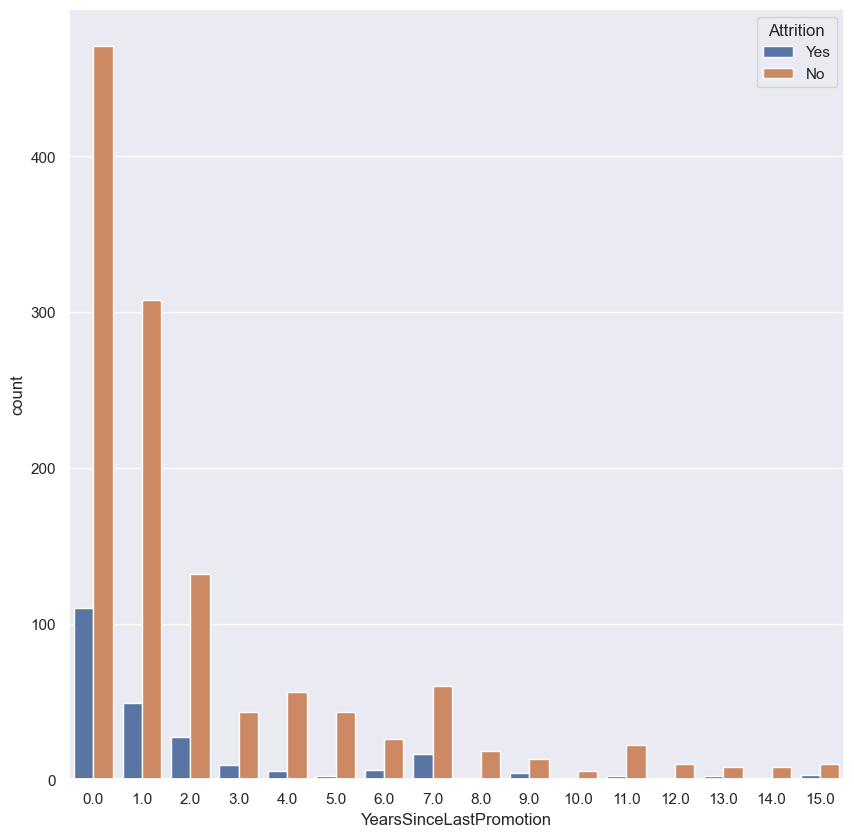

In [32]:
# visualize the distribution of attrition across yearssincelastpromotion
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=data)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

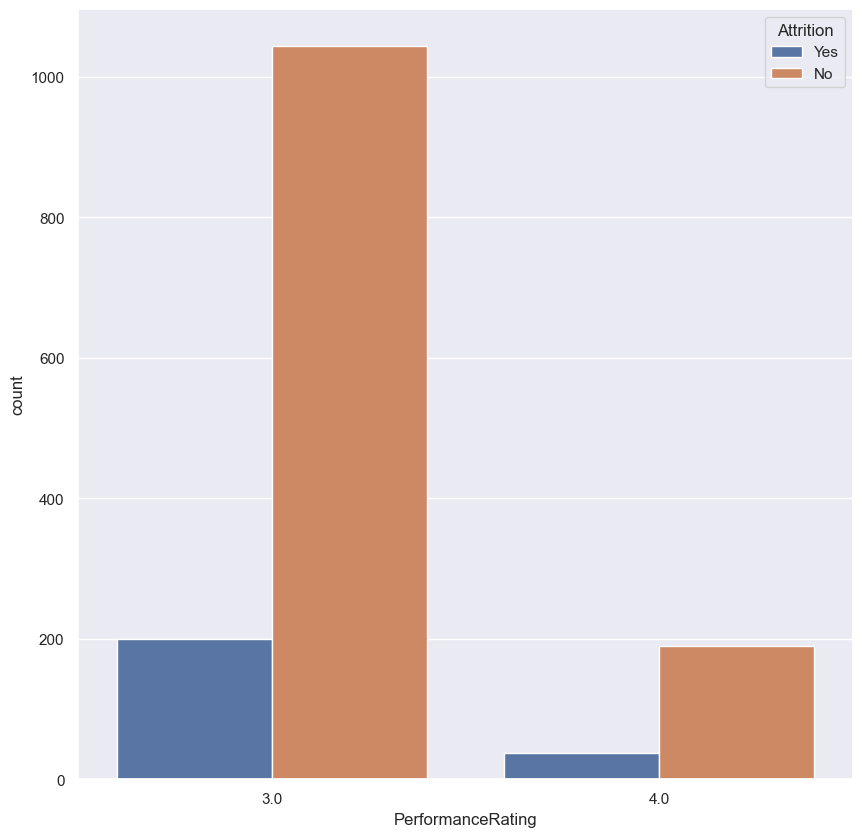

In [33]:
# visualize the distribution of attrition across performance rating
sns.countplot(x='PerformanceRating',hue='Attrition',data=data)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

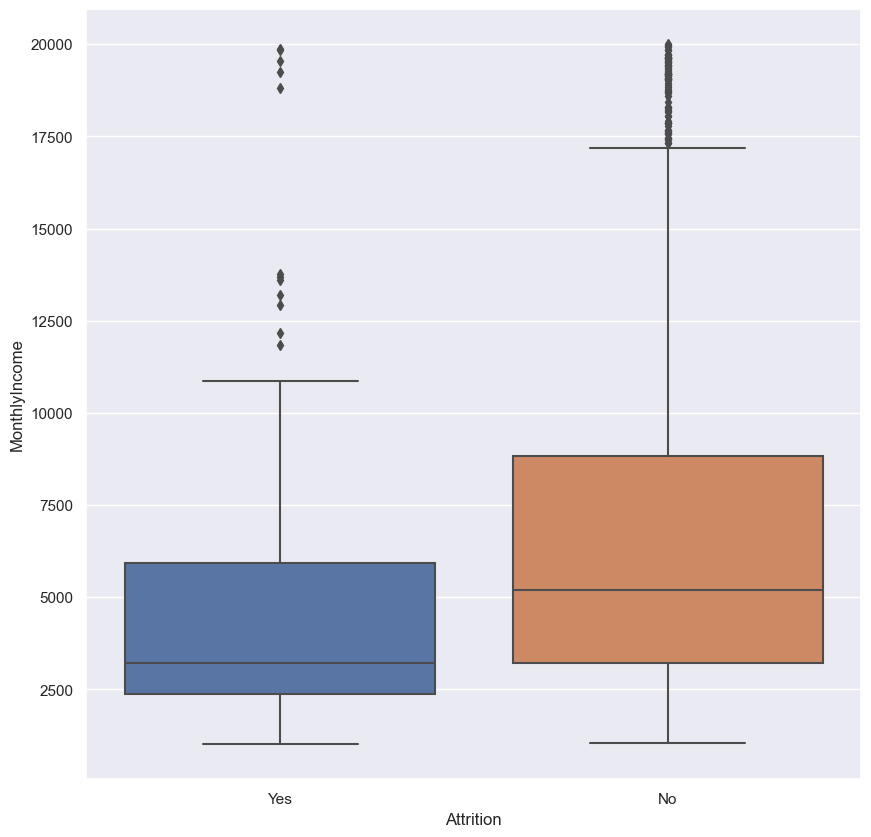

In [34]:
#distribution of monthly income based on the employee's attrition status
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)

In [35]:
#converting categorical variables into numerical representations
def attritioncount(x):
    if x=='Yes':
        return int(1)
    else:
        return int(0)

    

def departmentcount(x):
    dic1={'Human Resources':1,'Research & Development':2,'Sales':3}
    return int(dic1[x])

dic2={'Sales Executive':1,'Research Scientist':2, 'Laboratory Technician':3,
       'Manufacturing Director':4, 'Healthcare Representative':5, 'Manager':6,
       'Sales Representative':7, 'Research Director':8, 'Human Resources':9}
def jobrole(x):
    return int(dic2[x])

def gendercount(x):
    if x=='Male':
        return int(1)
    else:
        return int(0)
    
dic3={'Single':1, 'Married':2, 'Divorced':3}
def marital(x):
    return int(dic3[x])

In [36]:
# Retrieve the unique values in the JobLevel column
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [37]:
# Retrieve the unique values in the MaritalStatus column
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [38]:
# Transforming categorical variables into numerical values
data['Attrition']=data['Attrition'].apply(attritioncount)

C:\Users\DHANUSREE.V.S\AppData\Local\Temp\ipykernel_21780\2409430947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Attrition']=data['Attrition'].apply(attritioncount)


In [39]:
data['Department']=data['Department'].apply(departmentcount)
data['JobRole']=data['JobRole'].apply(jobrole)
data['Gender']=data['Gender'].apply(gendercount)
data['MaritalStatus']=data['MaritalStatus'].apply(marital)

C:\Users\DHANUSREE.V.S\AppData\Local\Temp\ipykernel_21780\2007305473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Department']=data['Department'].apply(departmentcount)
C:\Users\DHANUSREE.V.S\AppData\Local\Temp\ipykernel_21780\2007305473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JobRole']=data['JobRole'].apply(jobrole)
C:\Users\DHANUSREE.V.S\AppData\Local\Temp\ipykernel_21780\2007305473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [40]:
data.loc[0]

Age                           41.0
Attrition                      1.0
Department                     3.0
DistanceFromHome               1.0
Education                      2.0
Gender                         0.0
JobInvolvement                 3.0
JobLevel                       2.0
JobRole                        1.0
JobSatisfaction                4.0
MaritalStatus                  1.0
MonthlyIncome               5993.0
NumCompaniesWorked             8.0
PercentSalaryHike             11.0
PerformanceRating              3.0
RelationshipSatisfaction       1.0
StockOptionLevel               0.0
TotalWorkingYears              8.0
WorkLifeBalance                1.0
YearsAtCompany                 6.0
YearsInCurrentRole             4.0
YearsSinceLastPromotion        0.0
Name: 0, dtype: float64

In [41]:
data.dtypes

Age                         float64
Attrition                     int64
Department                    int64
DistanceFromHome            float64
Education                   float64
Gender                        int64
JobInvolvement              float64
JobLevel                    float64
JobRole                       int64
JobSatisfaction             float64
MaritalStatus                 int64
MonthlyIncome               float64
NumCompaniesWorked          float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StockOptionLevel            float64
TotalWorkingYears           float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     float64
dtype: object

In [42]:
y=data['Attrition']
X=data.drop('Attrition',axis=1)

In [43]:
# Define the logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic regression algorithm
def logistic_regression(X_train, y_train, X_test):
    # Initialize parameters
    learning_rate = 0.01
    num_iterations = 1000
    num_features = X_train.shape[1]
    theta = np.zeros(num_features)
    
    # Perform gradient descent
    for _ in range(num_iterations):
        # Calculate the hypothesis/predictions
        z = np.dot(X_train, theta)
        h = sigmoid(z)
        
        # Calculate the gradients and update theta
        gradient = np.dot(X_train.T, (h - y_train)) / len(y_train)
        theta -= learning_rate * gradient
    
    # Predict on the test set
    z = np.dot(X_test, theta)
    h = sigmoid(z)
    y_prediction = np.round(h)
    
    return y_prediction

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform logistic regression and get predictions
y_prediction = logistic_regression(X_train, y_train, X_test)
print("Y-Prediction: \n",y_prediction)

# Calculate and print the accuracy score
test_score = np.mean(y_prediction == y_test)
print("Test score: ",test_score)

# Calculate and print the confusion matrix
conf_m = confusion_matrix(y_test, y_prediction)
print("Confusion matrix: \n",conf_m)

# Calculate and print the classification report
report = classification_report(y_test, y_prediction)
print("Classification report: \n",report)

# Perform prediction on a single example
x = np.array([[41, 3, 1, 1, 0, 1, 2, 1, 1, 1, 5993, 5, 2, 1, 1, 0, 8, 1, 3, 3, 0]])
prediction = logistic_regression(X_train, y_train, x)
print("Prediction of instance: ",prediction)


C:\Users\DHANUSREE.V.S\AppData\Local\Temp\ipykernel_21780\3176965983.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Y-Prediction: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

C:\Users\DHANUSREE.V.S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DHANUSREE.V.S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DHANUSREE.V.S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DHANUSREE.V.S\AppData\

Prediction of instance:  [0.]


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


def train_random_forest(X_train, y_train, n_estimators=100):
    """
    Train a random forest model.
    
    Parameters:
    - X_train: Training features (numpy array or matrix)
    - y_train: Training target variable (numpy array)
    - n_estimators: Number of decision trees in the random forest (default: 100)
    
    Returns:
    - forest: List of trained decision trees in the random forest
    """
    forest = []
    
    for _ in range(n_estimators):
        tree = DecisionTreeClassifier()
        indices = np.random.choice(range(X_train.shape[0]), size=X_train.shape[0], replace=True)
        X_train_subset = X_train[indices]
        y_train_subset = y_train[indices]
        tree.fit(X_train_subset, y_train_subset)
        forest.append(tree)
    
    return forest

def predict_random_forest(X, forest):
    """
    Predict labels using a random forest model.
    
    Parameters:
    - X: Input features (numpy array or matrix)
    - forest: List of trained decision trees in the random forest
    
    Returns:
    - y_pred: Predicted labels
    """
    predictions = np.zeros((X.shape[0], len(forest)))
    
    for i, tree in enumerate(forest):
        predictions[:, i] = tree.predict(X)
    
    y_pred = np.round(np.mean(predictions, axis=1))
    
    return y_pred

# Convert DataFrame to NumPy arrays
X_train = X_train.values
y_train = y_train.values

# Train the random forest model
my_forest = train_random_forest(X_train, y_train, n_estimators=100)

# Calculate test score
score2 = np.mean(predict_random_forest(X_test.values, my_forest) == y_test.values)
print("Test score: ", score2)

# Predict using the trained model
y_pred = predict_random_forest(X_test.values, my_forest)
print("Y-prediction: \n", y_pred)

# Make a prediction for new data point(s)
x = np.array([[41, 3, 1, 2, 0, 3, 2, 1, 4, 1, 5993, 8, 11, 3, 1, 0, 8, 1, 6, 4, 0]])
x_prediction = predict_random_forest(x, my_forest)
print("Prediction of instance: ", x_prediction)

# Calculate confusion matrix
conf1 = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix: \n", conf1)

# Calculate classification report
report1 = classification_report(y_test.values, y_pred)
print("Classification report: \n", report1)


Test score:  0.8458049886621315
Y-prediction: 
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

In [46]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
ypre=classifier.predict(X_test)
print(ypre)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\DHANUSREE.V.S\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [48]:
score3=classifier.score(X_test,y_test)
print(score3)

0.8299319727891157


C:\Users\DHANUSREE.V.S\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
x=[[41,3,1,2,0,3,2,1,4,1,5993,8,11,3,1,0,8,1,6,4,0]]
print(classifier.predict(x))

[0]


C:\Users\DHANUSREE.V.S\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\DHANUSREE.V.S\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
conf2 = confusion_matrix(y_test, ypre)
print(conf2)

[[363  17]
 [ 58   3]]


In [52]:
report2 = classification_report(y_test, ypre)
print(report2)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       380
           1       0.15      0.05      0.07        61

    accuracy                           0.83       441
   macro avg       0.51      0.50      0.49       441
weighted avg       0.76      0.83      0.79       441



In [53]:
from sklearn.tree import DecisionTreeClassifier
classifi = DecisionTreeClassifier()
classifi.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pre1 = classifi.predict(X_test)
y_pre1

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [55]:
score3=classifi.score(X_test,y_test)
print(score3)

0.7573696145124716


In [48]:
import pickle

# Dump the trained random forest model into a pickle file
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(my_forest, file)

